In [25]:
from io import StringIO

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import matplotlib.pyplot  as plt
import statsmodels.api as sm
import sklearn as sk
from io import StringIO
from sklearn import tree
from sklearn import datasets
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from mpl_toolkits.mplot3d import Axes3D
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings("ignore")

# 맥 폰트 깨짐 이슈 해결
from matplotlib import rc
%matplotlib inline
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
from sklearn.datasets import fetch_california_housing

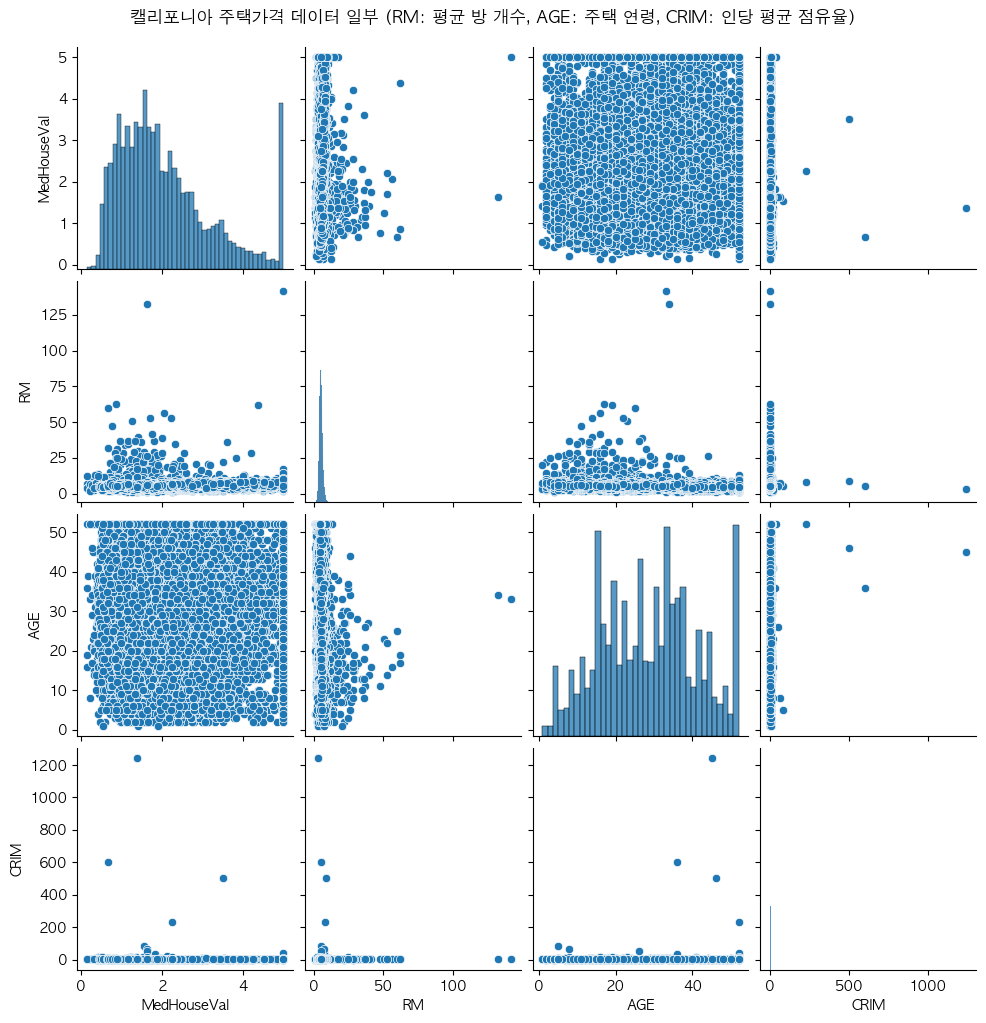

In [10]:
# 데이터셋 로드
california_housing = fetch_california_housing()

# 데이터프레임으로 변환
df = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
df["MedHouseVal"] = california_housing.target

# 필요한 컬럼 선택
df = df.rename(columns={"MedInc": "MedIncome", "HouseAge": "AGE", "AveRooms": "RM", "AveOccup": "CRIM"})
subset = df[["MedHouseVal", "RM", "AGE", "CRIM"]]

# pairplot 생성
g = sns.pairplot(subset)
g.fig.suptitle("캘리포니아 주택가격 데이터 일부 (RM: 평균 방 개수, AGE: 주택 연령, CRIM: 인당 평균 점유율)", y=1.02)
plt.show()

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
np.random.seed(0) 
df.sample(frac=1).reset_index(drop=True).head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.8,2.8,5.1,2.4,virginica
1,6.0,2.2,4.0,1.0,versicolor
2,5.5,4.2,1.4,0.2,setosa
3,7.3,2.9,6.3,1.8,virginica
4,5.0,3.4,1.5,0.2,setosa
5,6.3,3.3,6.0,2.5,virginica
6,5.0,3.5,1.3,0.3,setosa
7,6.7,3.1,4.7,1.5,versicolor
8,6.8,2.8,4.8,1.4,versicolor
9,6.1,2.8,4.0,1.3,versicolor


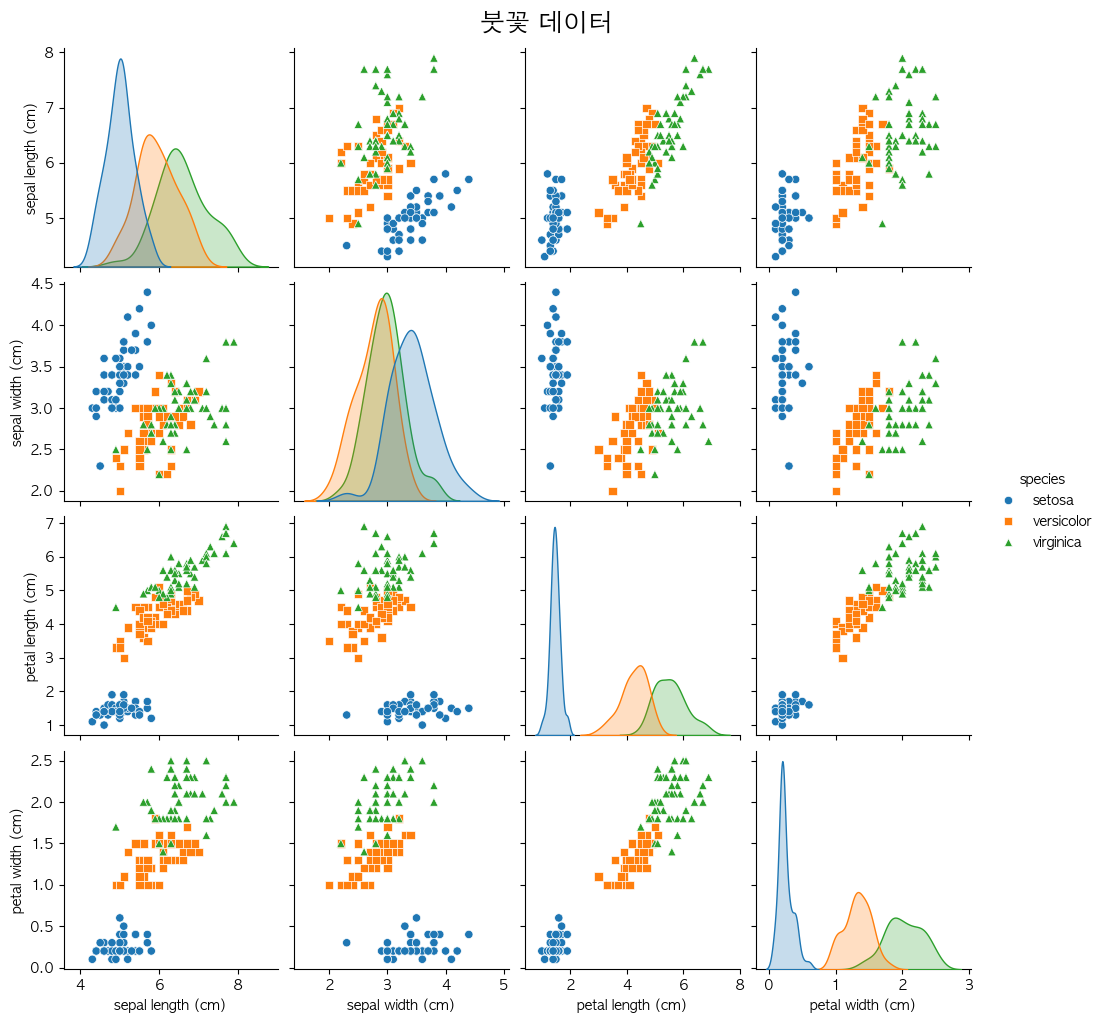

In [15]:
# 데이터셋 로드
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["species"] = iris.target

# species 컬럼을 카테고리형으로 변환
df["species"] = df["species"].map({0: "setosa", 1: "versicolor", 2: "virginica"})

# pairplot 생성
sns.pairplot(df, hue="species", markers=["o", "s", "^"])
plt.suptitle("붓꽃 데이터", y=1.02, fontsize=18)
plt.show()

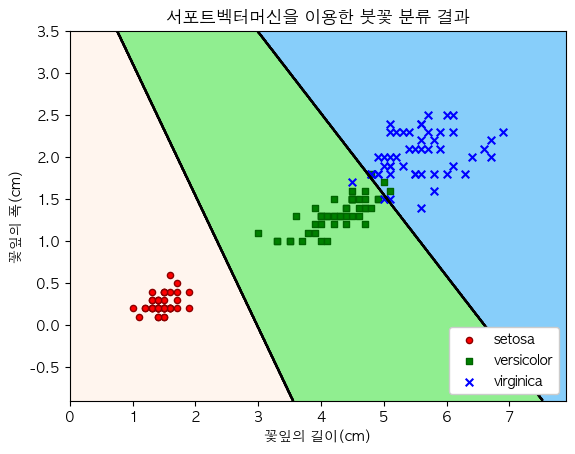

In [18]:
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
features = [2, 3]
X = iris.data[:, features]
y = iris.target
model = SVC(kernel="linear", random_state=0)
model.fit(X, y)
XX_min = X[:, 0].min() - 1
XX_max = X[:, 0].max() + 1
YY_min = X[:, 1].min() - 1
YY_max = X[:, 1].max() + 1
XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000),
                     np.linspace(YY_min, YY_max, 1000))
ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
cmap = mpl.colors.ListedColormap(['seashell', 'lightgreen', 'lightskyblue'])
plt.contourf(XX, YY, ZZ, cmap=cmap)
plt.contour(XX, YY, ZZ, colors='k')
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=20, label=iris.target_names[0],
            marker="o", edgecolors="darkred", facecolors="red")
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=20, label=iris.target_names[1],
            marker="s", edgecolors="darkgreen", facecolors="green")
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=30, label=iris.target_names[2],
            marker="x", edgecolors="darkblue", facecolors="blue")
plt.xlim(XX_min, XX_max)
plt.ylim(YY_min, YY_max)
plt.xlabel("꽃잎의 길이(cm)") 
plt.ylabel("꽃잎의 폭(cm)") 
plt.title("서포트벡터머신을 이용한 붓꽃 분류 결과") 
plt.legend(loc="lower right", framealpha=1) 
plt.show()

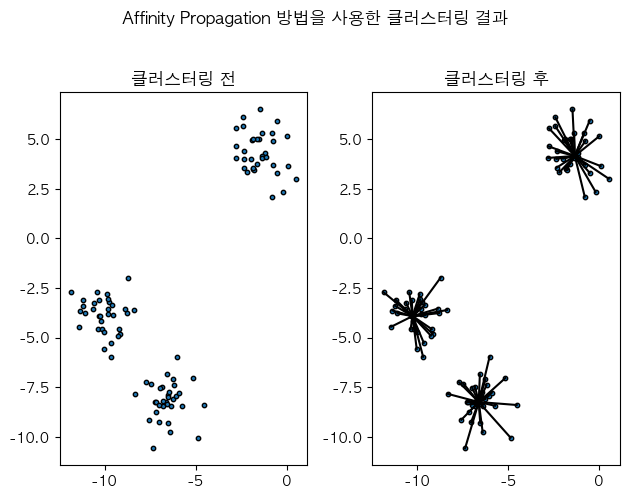

In [20]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AffinityPropagation
X, _ = make_blobs(n_features=2, centers=3, random_state=1)
model = AffinityPropagation().fit(X)
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], marker='o', s=10, edgecolor="k") 
plt.title("클러스터링 전")
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], marker='o', s=10, edgecolor="k") 
plt.title("클러스터링 후")
for k in range(3):
    cluster_center = X[model.cluster_centers_indices_[k]] 
    for x in X[model.labels_ == k]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], c="k")
plt.suptitle("Affinity Propagation 방법을 사용한 클러스터링 결과", y=1.03) 
plt.tight_layout()
plt.show()

In [27]:
csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")
df = pd.read_csv(csv_data, dtype={"x1": pd.Int64Dtype()}, parse_dates=[3])
df

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,<NA>,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,<NA>,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


In [28]:
df.isnull()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False
7,False,False,False,False,False
8,False,False,True,False,False


In [29]:
df.isnull().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

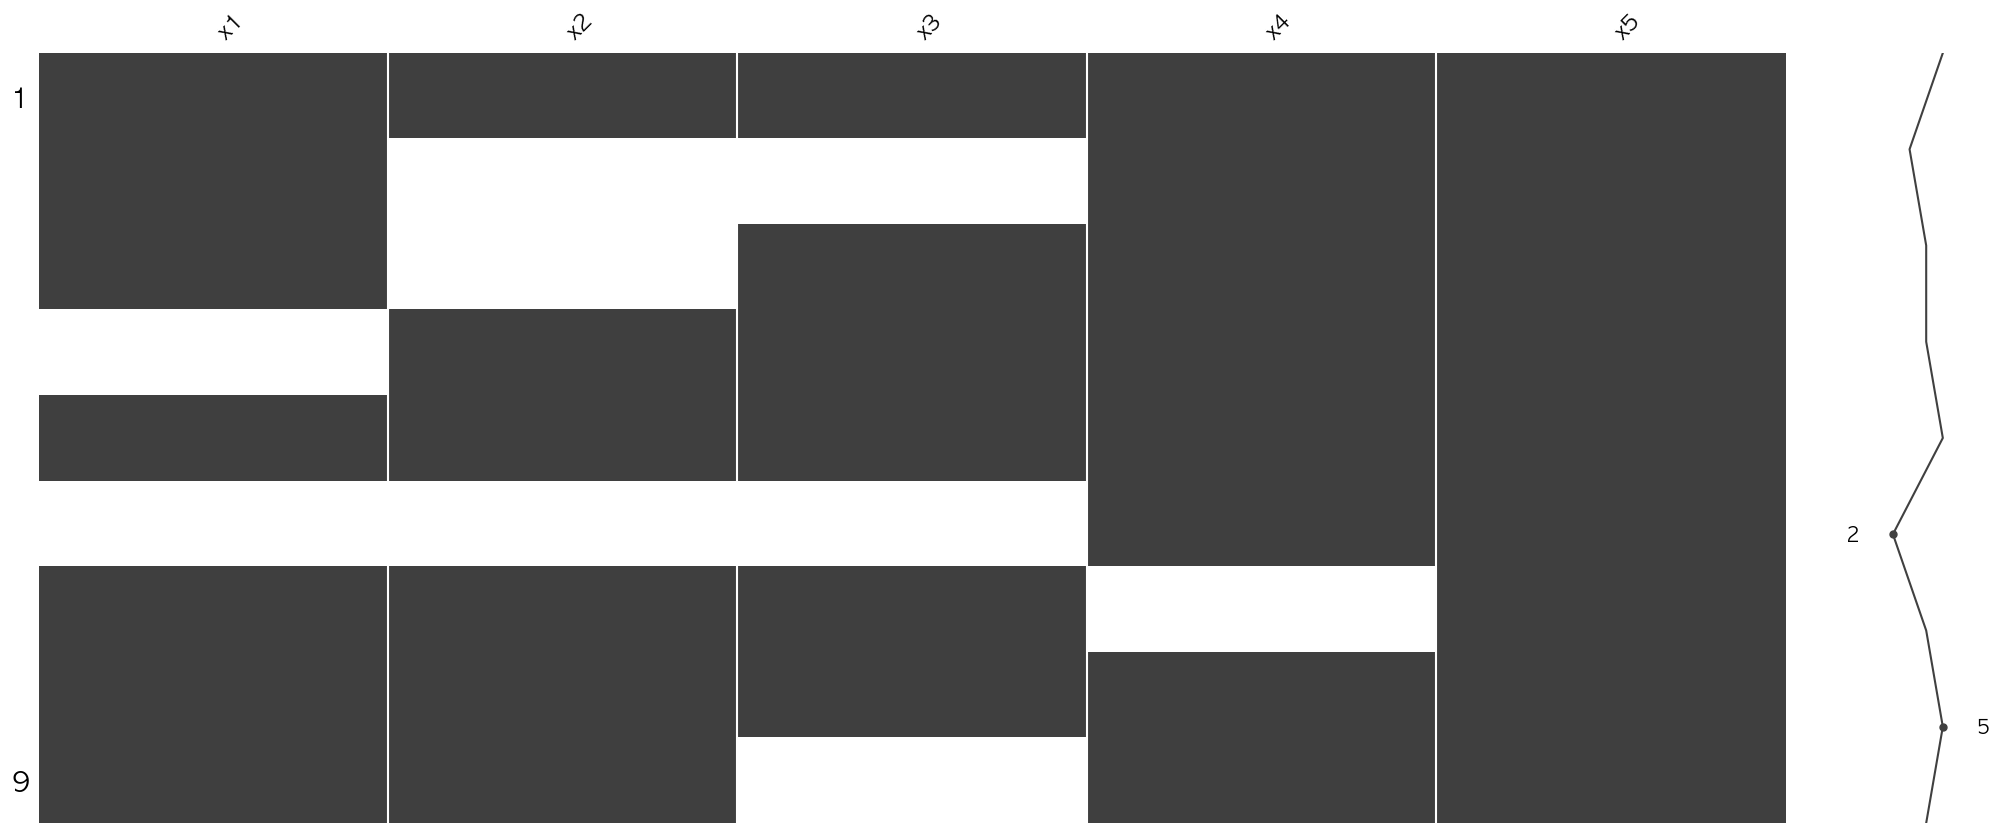

In [31]:
import missingno as msno
msno.matrix(df)
plt.show()

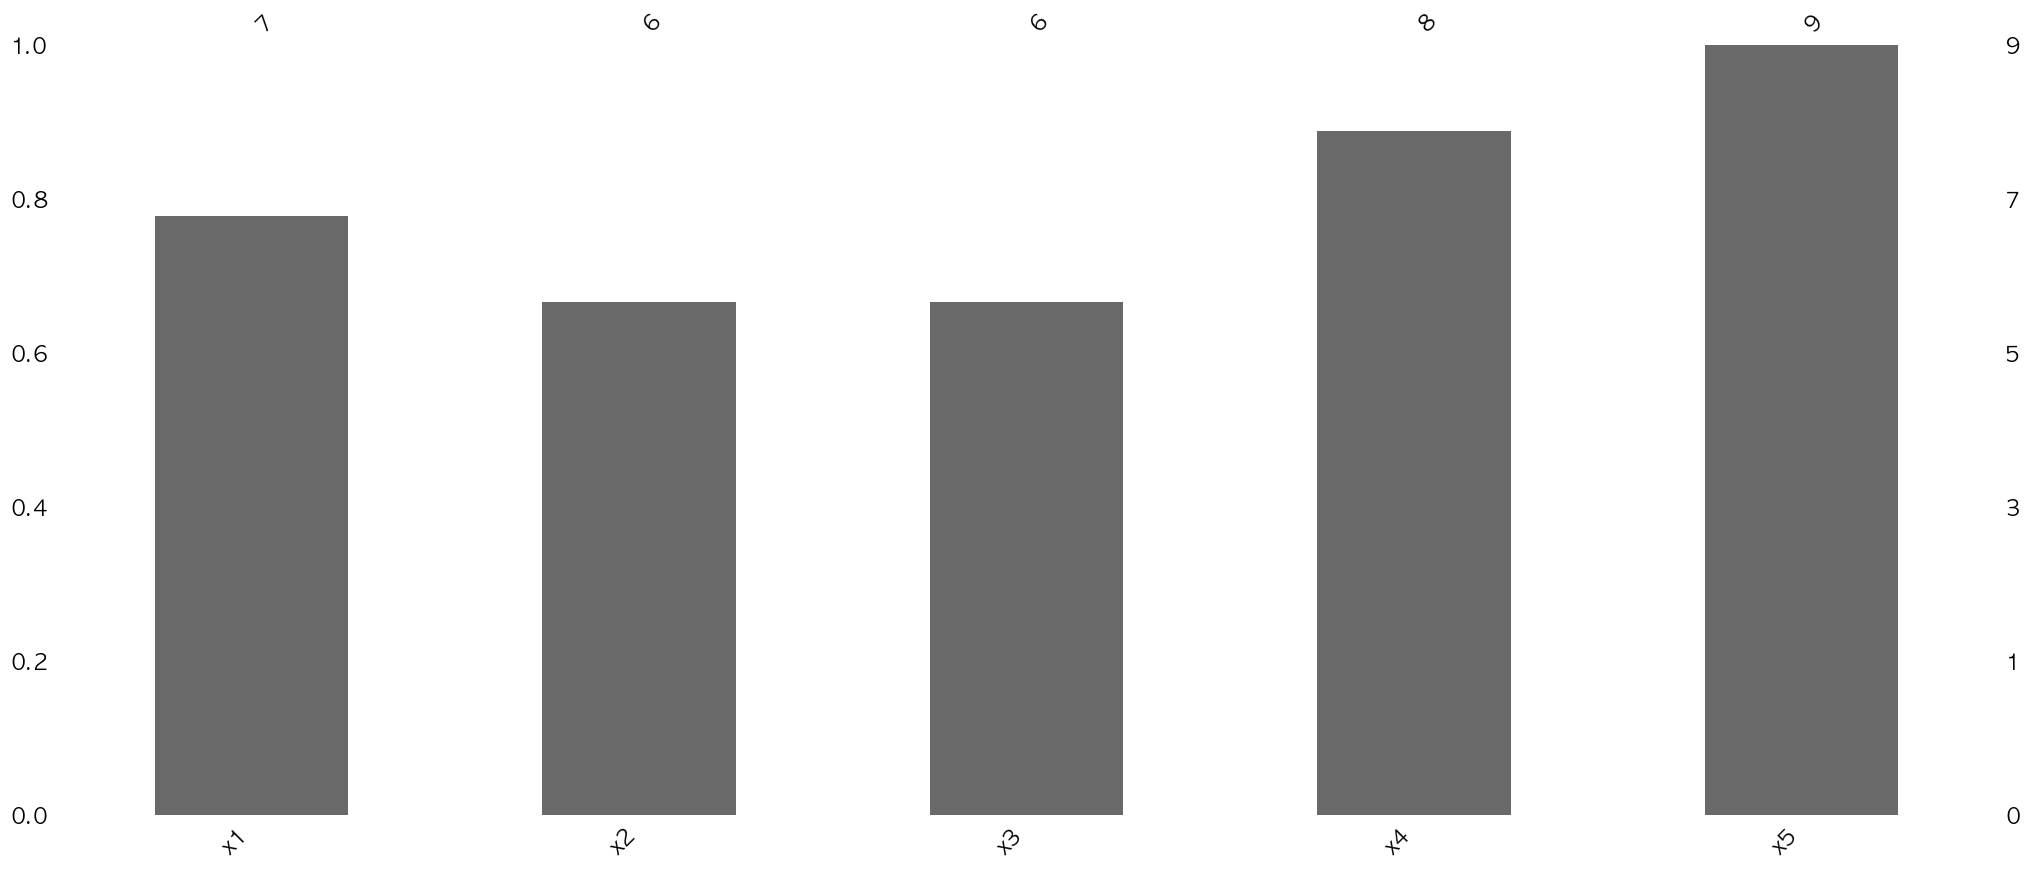

In [32]:
msno.bar(df)
plt.show()

In [33]:
titanic = sns.load_dataset("titanic")
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


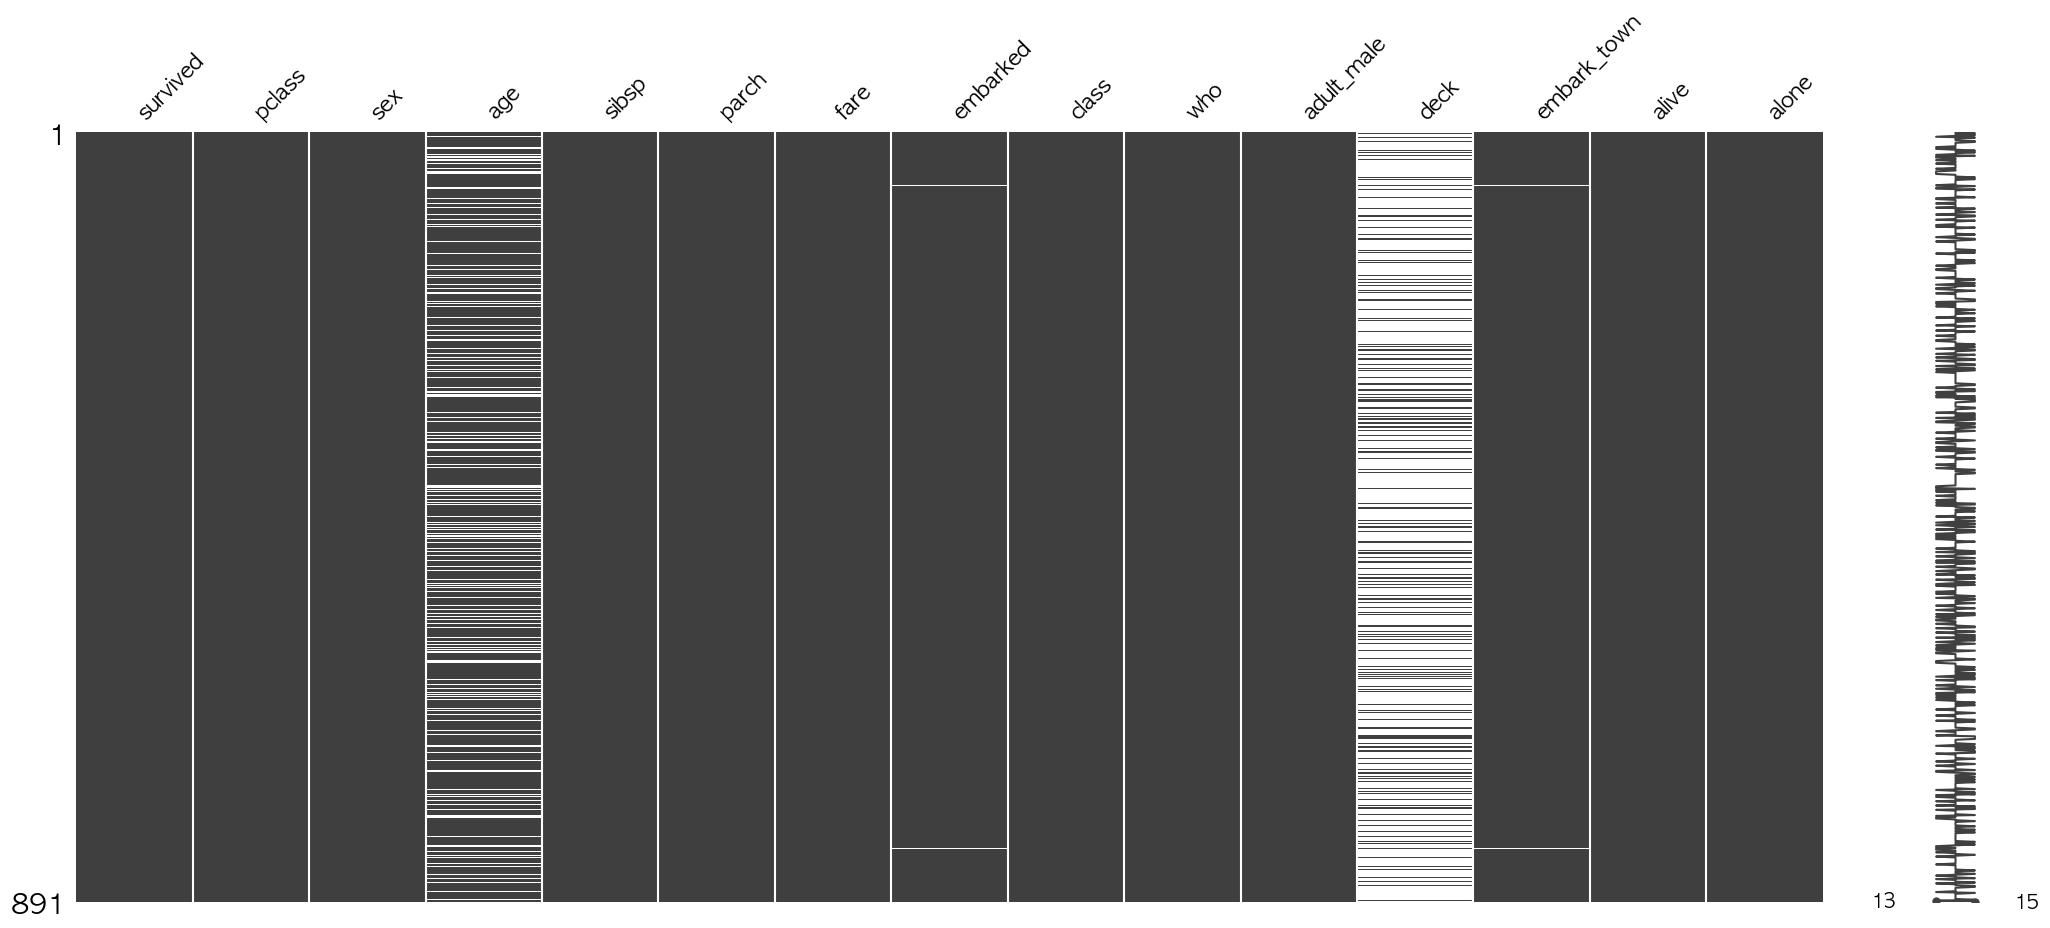

In [34]:
msno.matrix(titanic)
plt.show()

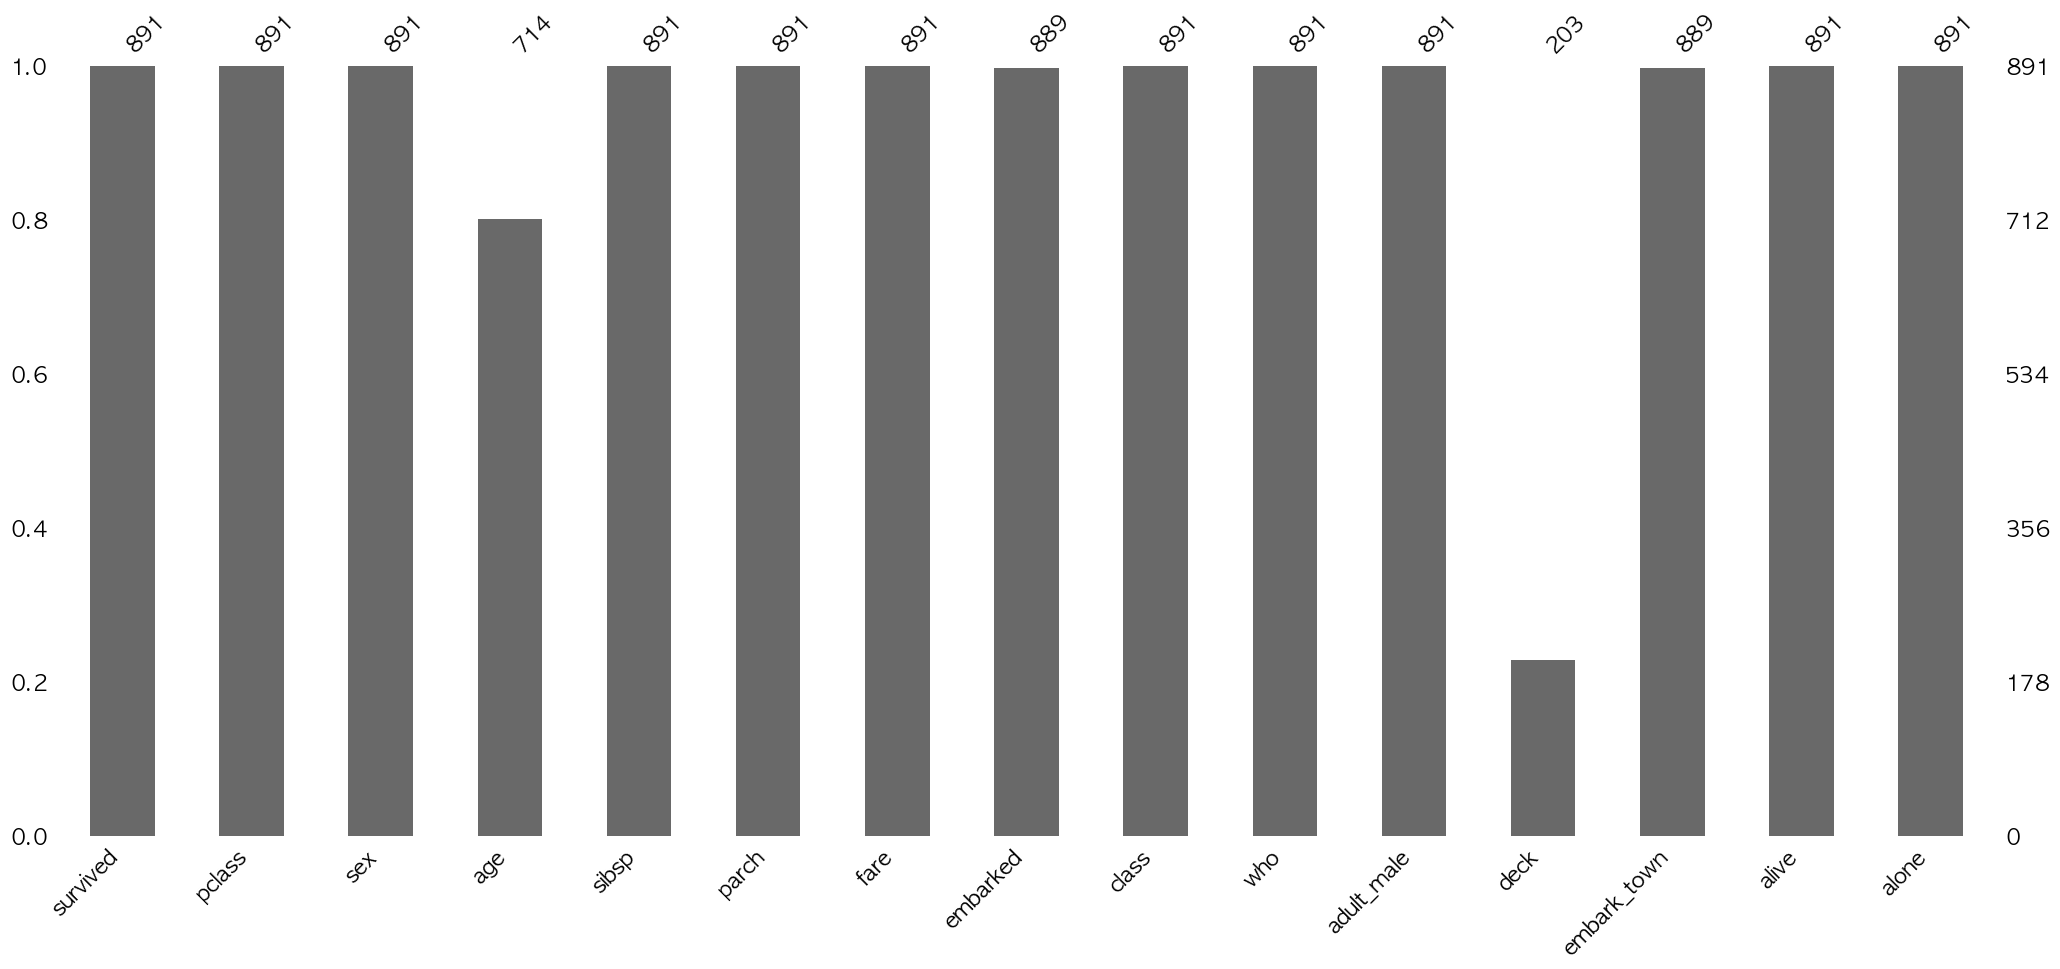

In [35]:
msno.bar(titanic)
plt.show()

In [36]:
df.dropna()

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
4,5,0.5,5.0,2019-01-05,B
7,8,0.8,8.0,2019-01-08,B


In [37]:
df.dropna(axis=1)

,x5
0,A
1,B
2,C
3,A
4,B
5,C
6,A
7,B
8,C


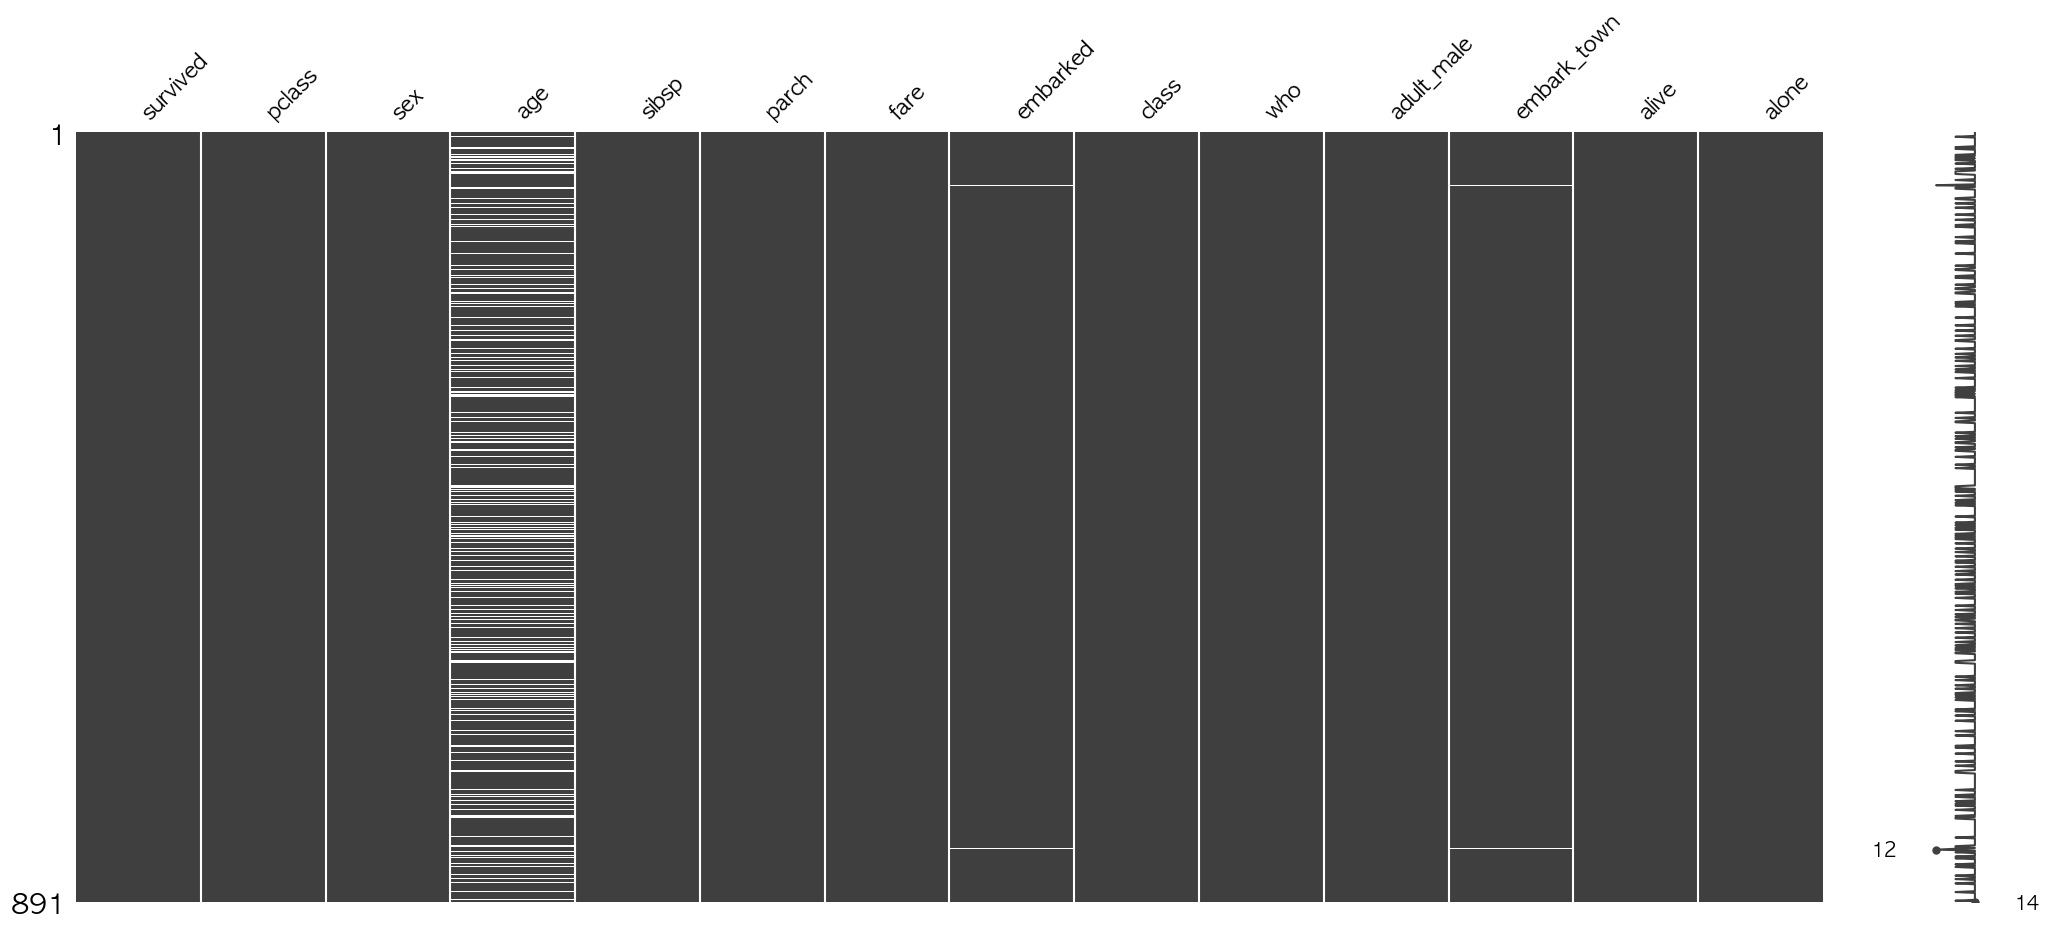

In [47]:
titanic = titanic.dropna(thresh=int(len(titanic) * 0.5), axis=1) 
msno.matrix(titanic)
plt.show()

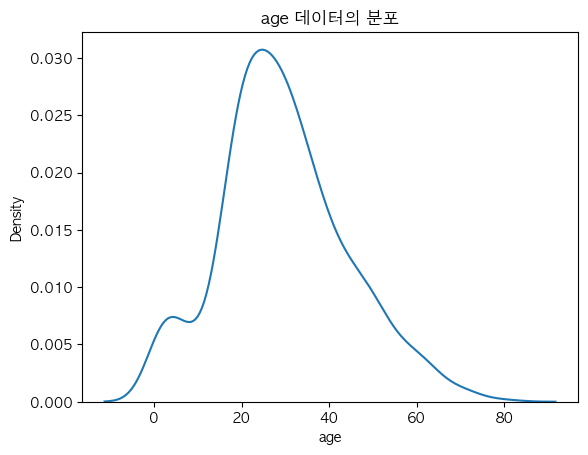

In [52]:
sns.kdeplot(titanic.age) 
plt.title("age 데이터의 분포") 
plt.show()

In [53]:
imputer_age = SimpleImputer(strategy="median")
titanic["age"] = imputer_embark_town.fit_transform(titanic[["age"]])
msno.matrix(titanic)
plt.show()

NameError: name 'imputer_embark_town' is not defined

In [55]:
from patsy import demo_data

df = pd.DataFrame(demo_data("x1", "x2", "x3", "x4", "x5"))
df

,x1,x2,x3,x4,x5
0,1.764052,-0.977278,0.144044,0.333674,-2.552990
1,0.400157,0.950088,1.454274,1.494079,0.653619
2,0.978738,-0.151357,0.761038,-0.205158,0.864436
3,2.240893,-0.103219,0.121675,0.313068,-0.742165
4,1.867558,0.410599,0.443863,-0.854096,2.269755


In [57]:
from patsy import dmatrix 
dmatrix("x1 + 0", data=df)

DesignMatrix with shape (5, 1)
       x1
  1.76405
  0.40016
  0.97874
  2.24089
  1.86756
  Terms:
    'x1' (column 0)

In [58]:
dmatrix("x1 + x2 + x3 + 0", data=df)

DesignMatrix with shape (5, 3)
       x1        x2       x3
  1.76405  -0.97728  0.14404
  0.40016   0.95009  1.45427
  0.97874  -0.15136  0.76104
  2.24089  -0.10322  0.12168
  1.86756   0.41060  0.44386
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x3' (column 2)

In [59]:
dmatrix("x1 + x2 + x3", data=df)

DesignMatrix with shape (5, 4)
  Intercept       x1        x2       x3
          1  1.76405  -0.97728  0.14404
          1  0.40016   0.95009  1.45427
          1  0.97874  -0.15136  0.76104
          1  2.24089  -0.10322  0.12168
          1  1.86756   0.41060  0.44386
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)
    'x3' (column 3)

In [60]:
dmatrix("x1 + x2 + x3 - 1", data=df)

DesignMatrix with shape (5, 3)
       x1        x2       x3
  1.76405  -0.97728  0.14404
  0.40016   0.95009  1.45427
  0.97874  -0.15136  0.76104
  2.24089  -0.10322  0.12168
  1.86756   0.41060  0.44386
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x3' (column 2)

In [74]:
dmatrix("x1 + np.log(np.abs(x2))", df)

DesignMatrix with shape (5, 3)
  Intercept       x1  np.log(np.abs(x2))
          1  1.76405            -0.02298
          1  0.40016            -0.05120
          1  0.97874            -1.88811
          1  2.24089            -2.27090
          1  1.86756            -0.89014
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'np.log(np.abs(x2))' (column 2)

In [75]:
from sklearn.preprocessing import FunctionTransformer


In [80]:
X = np.arange(7).reshape(-1, 1)
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])

In [82]:
X2 = np.vstack([X, [[1000]]])
X2

array([[   0],
       [   1],
       [   2],
       [   3],
       [   4],
       [   5],
       [   6],
       [1000]])

In [83]:
scaler.fit_transform(X2)

array([[-0.38705669],
       [-0.38402392],
       [-0.38099115],
       [-0.37795839],
       [-0.37492562],
       [-0.37189286],
       [-0.36886009],
       [ 2.64570872]])

In [86]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  6., 36.]])

In [87]:
X = 90 * np.arange(9).reshape(-1, 1)
X

array([[  0],
       [ 90],
       [180],
       [270],
       [360],
       [450],
       [540],
       [630],
       [720]])

In [88]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit_transform(X2)

array([[-1.00000000e+00],
       [-7.14285714e-01],
       [-4.28571429e-01],
       [-1.42857143e-01],
       [ 1.42857143e-01],
       [ 4.28571429e-01],
       [ 7.14285714e-01],
       [ 2.84714286e+02]])

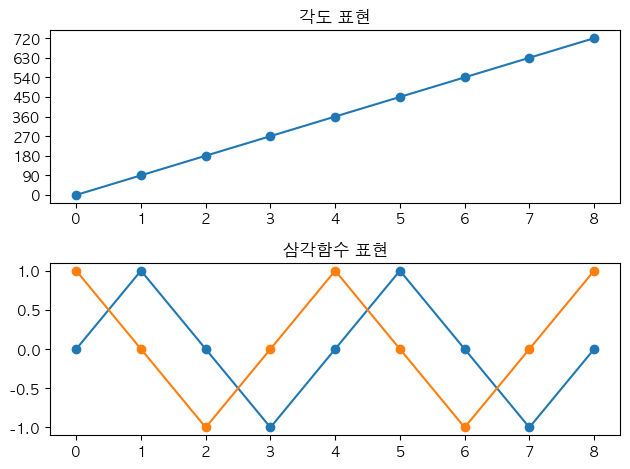

In [89]:
from sklearn.preprocessing import FunctionTransformer
def degree2sincos(X):
    x0 = np.sin(X * np.pi / 180) 
    x1 = np.cos(X * np.pi / 180) 
    X_new = np.hstack([x0, x1]) 
    return X_new

X2 = FunctionTransformer(degree2sincos).fit_transform(X)

plt.subplot(211) 
plt.plot(X, marker="o") 
plt.yticks(X.flatten()) 
plt.title("각도 표현") 
plt.subplot(212) 
plt.plot(X2, marker="o") 
plt.title("삼각함수 표현") 
plt.tight_layout() 
plt.show()